### Machine Learning Algorithms:

### Linear Regression

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [4]:
#importing data
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
x = df[['YearsExperience']]
y = df['Salary']

In [6]:
x.dtypes

YearsExperience    float64
dtype: object

In [7]:
y.dtypes

dtype('float64')

Text(0.5, 1.0, 'Salary bins')

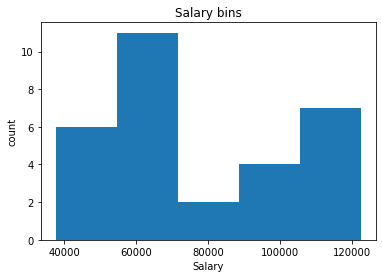

In [8]:
plt.hist(df["Salary"], bins = 5)
plt.xlabel("Salary") 
plt.ylabel("count") 
plt.title("Salary bins")

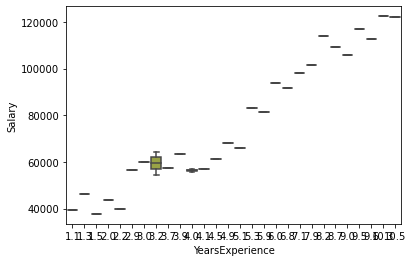

In [9]:
sns.boxplot(x="YearsExperience", y="Salary", data=df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [11]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


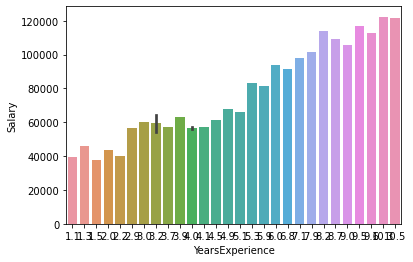

In [12]:
sns.barplot(x="YearsExperience", y="Salary", data=df)

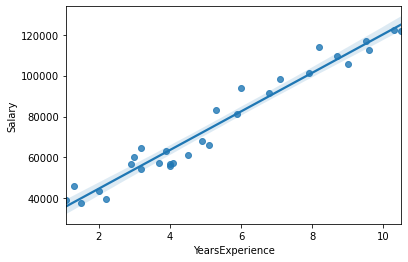

In [13]:
sns.regplot(x="YearsExperience", y="Salary", data=df)

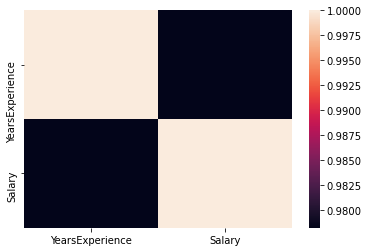

In [14]:
sns.heatmap(df.corr())

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
# Spliting the data into train and test part
x_data = df[['YearsExperience']]
y_data= df['Salary']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size= 0.30, random_state=0)
# x_train, x_test, y_train, y_test

In [22]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(x_test)
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

Visualaizing Train Set with model

Text(0, 0.5, 'Salary')

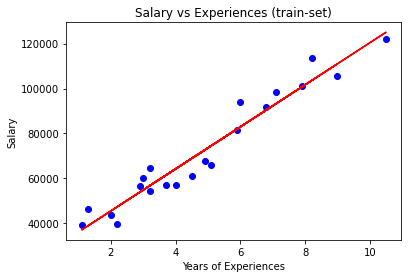

In [24]:
plt.scatter(x_train, y_train, color ='b')
plt.plot(x_train, lr.predict(x_train), color = 'r')
plt.title('Salary vs Experiences (train-set)')
plt.xlabel('Years of Experiences')
plt.ylabel('Salary')

Visualaizing Test Set with model

Text(0, 0.5, 'Salary')

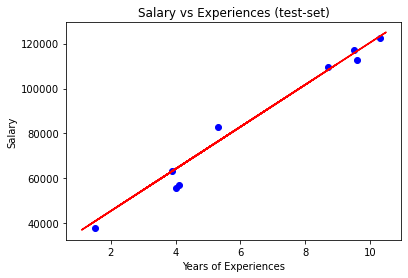

In [25]:
plt.scatter(x_test, y_test, color ='b')
plt.plot(x_train, lr.predict(x_train), color = 'r')
plt.title('Salary vs Experiences (test-set)')
plt.xlabel('Years of Experiences')
plt.ylabel('Salary')

R-Squared

In [26]:
lr.score(x_train, y_train)

0.9423777652193379

In [27]:
lr.score(x_test, y_test)

0.9740993407213511

In [28]:
lr.score(x_test, y_pred)

1.0

### Multiple Linear Regression

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
#importing data
comp = pd.read_csv('Companies.csv')
comp.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [71]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [72]:
comp.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


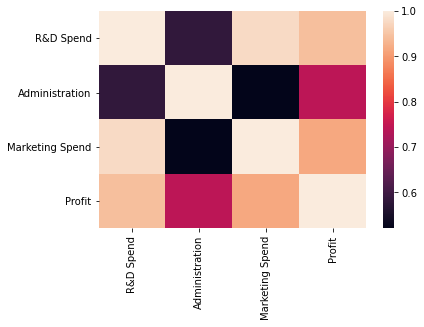

In [73]:
sns.heatmap(comp.corr())

#### Encoding Categorical Variable by dummy

In [93]:
dummy_1 = pd.get_dummies(comp["State"]) 
dummy_1.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [94]:
# mergeing data frames "comp" and "dummy_1"
df = pd.concat([comp, dummy_1], axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [95]:
# dropping the original column "State" from "df"
df.drop("State", axis = 1, inplace=True)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [96]:
# extracting only independent variables columns of Age and Salary of index 2 and 3
X = df.iloc[:,[0,1,2,4,5,6]].values
# extracting only dependent variable column of purchased with index 4
y = df.iloc[:,3].values

In [98]:
# Spliting the data into train and test part
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
# x_train, x_test, y_train, y_test

In [99]:
# Fitting LinearRegression
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x_train, y_train)

LinearRegression()

In [102]:
y_pred = lreg.predict(x_test)
print(y_pred)

[ 89790.61532916  88427.07187361  94894.67836972 175680.8672561
  83411.73042089 110571.90200074 132145.2293644   91473.37719687
 164597.05380606  53222.82667401  66950.1905099  150566.43987004
 126915.20858596  59337.85971051 177513.91053061  75316.28143051
 118248.14406603 164574.40699901 170937.28981069 182069.11645084
 118845.03252689  85669.95112229 180992.59396143  84145.08220145
 105005.83769214 101233.56772747  53831.07669092  56881.41475225
  68896.39346905 210040.00765883 120778.72270894 111724.87157654
 101487.90541518 137959.02649623  63969.95996744 108857.91214126
 186014.72531987 171442.64130747 174644.26529204 117671.49128195
  96731.37857434 165452.25779409 107724.34331255  50194.54176914
 116513.89532178  58632.48986821 158416.46827609  78541.4852161
 159727.66671743 131137.87699644 184880.70924515 174609.08266879
  93745.66352059  78341.13383418 180745.90439079  84461.61490552
 142900.90602902 170618.44098396  84365.09530839 105307.3716218
 141660.07290786  52527.3434

In [103]:
#Calcilating the Coefficients(slopes)
print(lreg.coef_)

[ 5.25845857e-01  8.44390881e-01  1.07574255e-01  5.26235224e+02
 -3.54301375e+02 -1.71933849e+02]


In [104]:
#Calcilating the intercept
print(lreg.intercept_)

-51561.46494777102


In [105]:
#Calculating the R^2
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112695892268794

In [108]:
# R-Squared
lreg.score(x_train, y_train)

0.9585497032796175

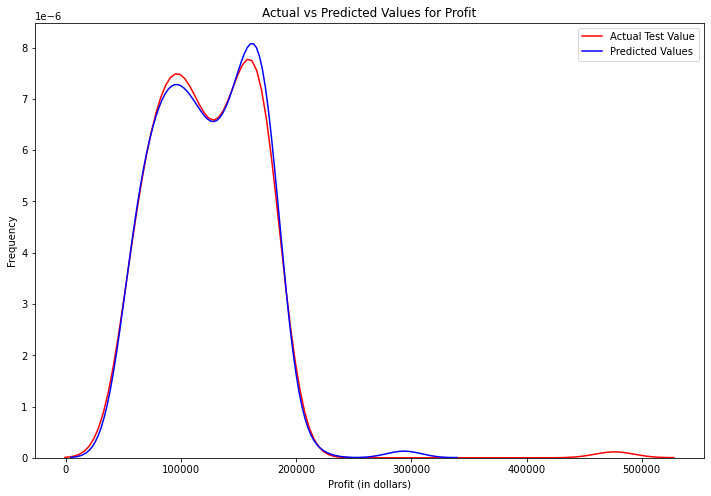

In [111]:
# visualization with density plot
plt.figure(figsize=(12, 8))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Test Value")
ax1 = sns.distplot(y_pred, hist=False, color="b", label="Predicted Values")

plt.title('Actual vs Predicted Values for Profit') 
plt.xlabel('Profit (in dollars)') 
plt.ylabel('Frequency')
plt.show() 
plt.close()

### Logistic Regression

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [39]:
#importing data
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [43]:
# extracting only independent variables columns of Age and Salary of index 2 and 3
X = df.iloc[:,[2,3]].values
# extracting only dependent variable column of purchased with index 4
y = df.iloc[:,4].values

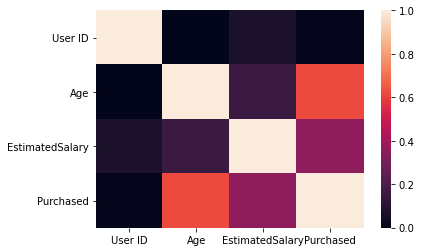

In [46]:
sns.heatmap(df.corr())

In [47]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [51]:
# Spliting the data into train and test part
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
# x_train, x_test, y_train, y_test

In [52]:
# Feture Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)

In [54]:
# Fitting Logistic Regression
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train, y_train)

LogisticRegression()

In [55]:
y_pred = lgr.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [56]:
#Visualising the test set result
from matplotlib.colors import ListedColormap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


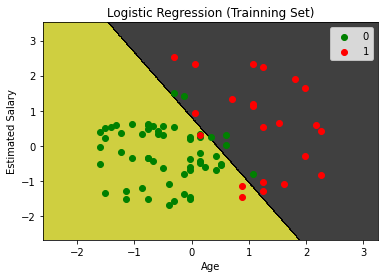

In [67]:
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max()+1, step = 0.01),
                    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max()+1, step = 0.01))
plt.contourf(x1, x2, lgr.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('y','k')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set== j, 0], x_set[y_set == j, 1],
               c = ListedColormap(('g', 'r'))(i), label = j)
plt.title("Logistic Regression (Trainning Set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[52,  6],
       [ 3, 19]])

In [74]:
total_points_in_test_set = 52+19+3+6
total_points_in_test_set

80

In [76]:
accuracy_percentage = (52 + 19)/80*100
accuracy_percentage

88.75

### Decision Tree

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [80]:
#importing data
kyp= pd.read_csv('kyphosis.csv')
kyp.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [83]:
x= kyp.drop('Kyphosis', axis = 1)
y= kyp['Kyphosis']

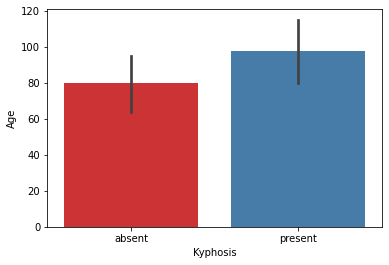

In [98]:
sns.barplot(x ="Kyphosis", y="Age", data=kyp)

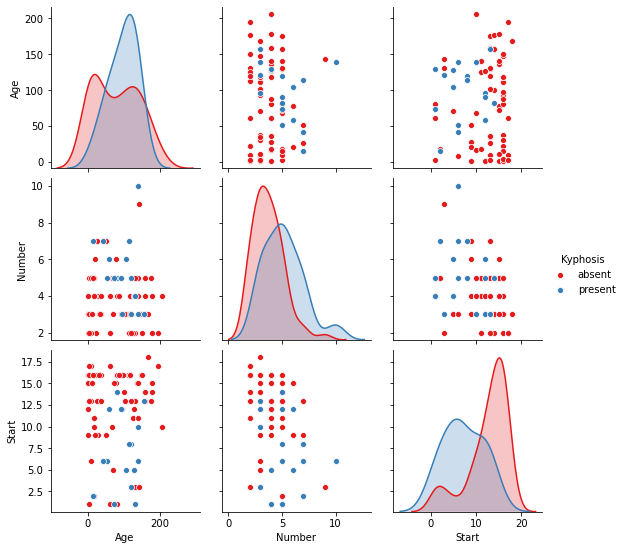

In [101]:
sns.pairplot(kyp , hue = 'Kyphosis', palette = 'Set1')

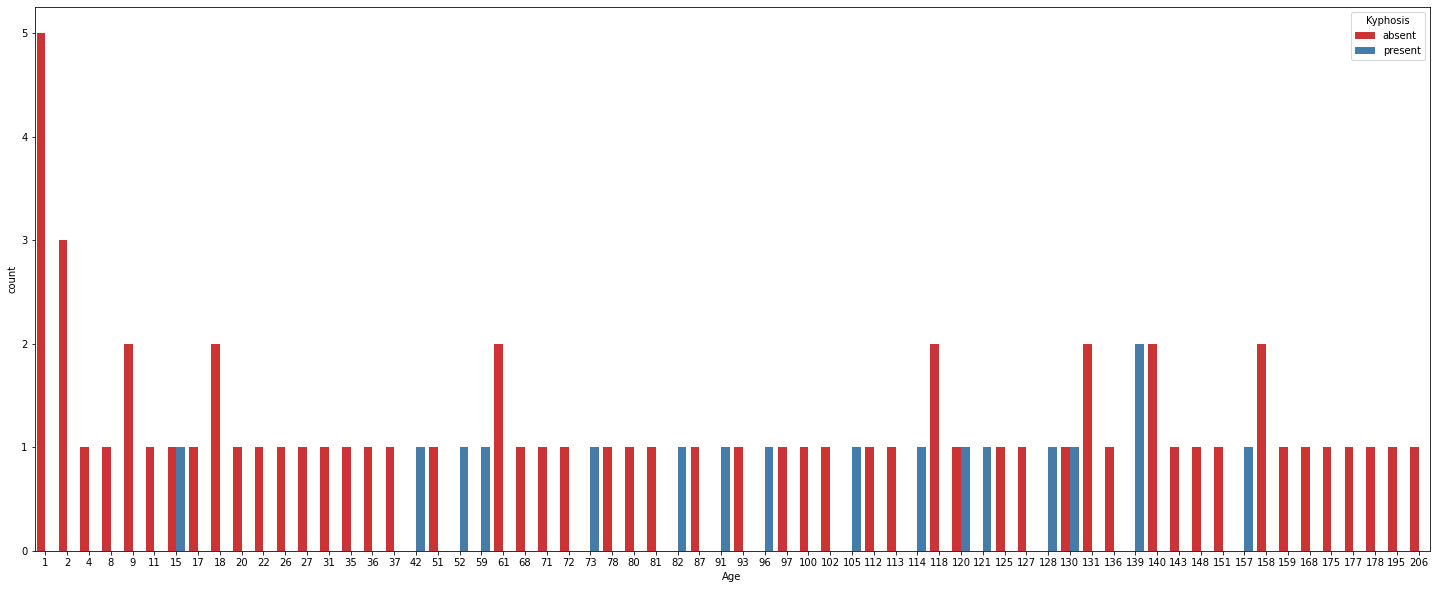

In [105]:
plt.figure(figsize=(25,10))
sns.countplot(x = 'Age', hue = 'Kyphosis', data = kyp ,  palette = 'Set1')

In [110]:
# Spliting the data into train and test part
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=0)
# x_train, x_test, y_train, y_test

In [111]:
# Fitting model DT
from sklearn.tree import DecisionTreeClassifier

In [112]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [121]:
dt_pred = dtree.predict(x_test)
dt_pred

array(['absent', 'absent', 'present', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'present', 'absent', 'absent',
       'present', 'present', 'absent', 'absent', 'present', 'absent',
       'present'], dtype=object)

In [122]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

      absent       0.88      0.64      0.74        22
     present       0.11      0.33      0.17         3

    accuracy                           0.60        25
   macro avg       0.49      0.48      0.45        25
weighted avg       0.78      0.60      0.67        25



In [123]:
confusion_matrix(y_test, dt_pred)

array([[14,  8],
       [ 2,  1]])

In [118]:
accuracy_percentage = 15/25
accuracy_percentage

0.6

#### Random Forest

In [129]:
# Fitting model Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [130]:
rfc_pred = rfc.predict(x_test)
rfc_pred

array(['absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present'], dtype=object)

In [131]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.86      0.86      0.86        22
     present       0.00      0.00      0.00         3

    accuracy                           0.76        25
   macro avg       0.43      0.43      0.43        25
weighted avg       0.76      0.76      0.76        25



In [132]:
confusion_matrix(y_test, dt_pred)

array([[14,  8],
       [ 2,  1]])

### K-Nearest Neighbors

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [134]:
#importing data
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [135]:
# extracting only independent variables columns of Age and Salary of index 2 and 3
X = df.iloc[:,[2,3]].values
# extracting only dependent variable column of purchased with index 4
y = df.iloc[:,4].values

In [136]:
# Spliting the data into train and test part
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# x_train, x_test, y_train, y_test

In [137]:
# Feture Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)

In [139]:
# Fitting Logistic Regression
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

KNeighborsClassifier()

In [140]:
y_pred = knc.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [141]:
#Visualising the test set result
from matplotlib.colors import ListedColormap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


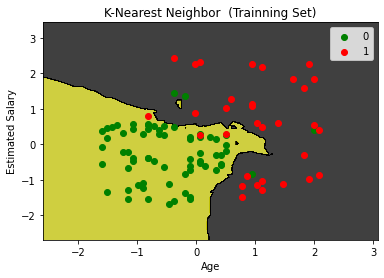

In [142]:
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max()+1, step = 0.01),
                    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max()+1, step = 0.01))
plt.contourf(x1, x2, knc.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('y','k')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set== j, 0], x_set[y_set == j, 1],
               c = ListedColormap(('g', 'r'))(i), label = j)
plt.title("K-Nearest Neighbor  (Trainning Set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [143]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[64,  4],
       [ 3, 29]])

In [144]:
accuracy_percentage = 93/100
accuracy_percentage

0.93

### K-Means Clustering:

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

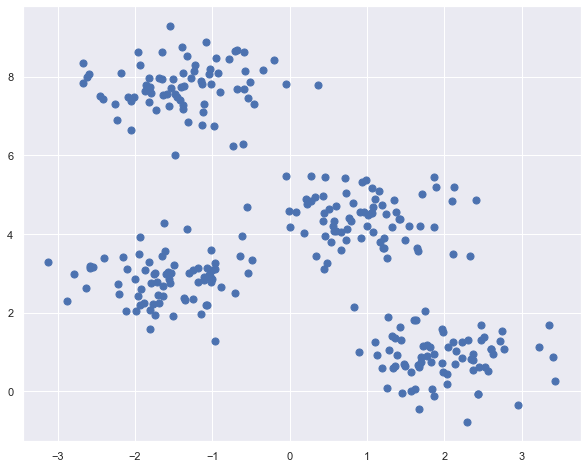

In [122]:
from sklearn.datasets.samples_generator import make_blobs
x, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std=0.60, random_state =0)
plt.figure(figsize=(10,8))
plt.scatter(x[:, 0], x[:, 1], s = 50)

In [126]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
y_kmeans

array([1, 2, 3, 2, 1, 1, 0, 3, 2, 2, 0, 2, 3, 2, 1, 3, 3, 1, 0, 0, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 3, 2, 2, 3, 2, 2, 2, 2, 2, 0, 1, 3, 0, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 3, 2, 0, 0, 0,
       2, 1, 2, 0, 3, 0, 2, 0, 0, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 1, 3,
       2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 3, 0, 2, 1, 2, 1, 3, 1, 1, 3, 2, 3,
       0, 0, 1, 2, 1, 3, 2, 1, 1, 3, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       0, 1, 2, 0, 0, 2, 3, 2, 2, 0, 3, 0, 3, 0, 2, 3, 2, 2, 2, 3, 2, 3,
       1, 0, 2, 0, 1, 3, 2, 3, 3, 1, 3, 0, 0, 3, 1, 3, 3, 2, 1, 3, 0, 2,
       1, 1, 3, 0, 1, 3, 0, 0, 3, 3, 3, 3, 1, 2, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 2, 3, 0, 1, 0, 3, 2, 0, 2, 3, 2, 3, 0, 3, 3, 2, 0, 0, 1, 1, 3,
       2, 1, 1, 0, 1, 0, 3, 2, 2, 3, 3, 2, 3, 1, 0, 3, 1, 0, 2, 0, 1, 3,
       1, 2, 2, 2, 2, 0, 0, 2, 3, 0, 1, 3, 0, 0, 0, 1, 1, 2, 3, 3, 0, 1,
       2, 0, 3, 2, 3, 1, 1, 0, 0, 3, 1, 1, 1, 3, 2, 2, 1, 1, 3, 1, 1, 1,
       2, 0, 2, 3, 1, 1, 2, 2, 2, 1, 1, 3, 2, 0], d

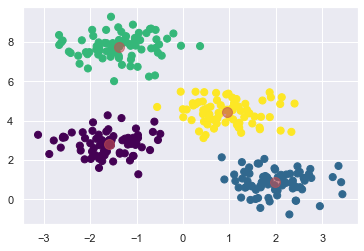

In [141]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(x, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(x.shape[0])[:n_clusters]
    centers = x[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(x, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([x[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(x, 4)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s = 50, cmap ='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c = 'r', s =100, alpha = 0.6);
